In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = 'data/sfpd_clean.csv'
sfdata = pd.read_csv(filename)
locDict = {}

In [3]:
locations = sfdata['Location'].unique()


In [13]:
# np.savetxt('data\locations.txt', locations)
len(locDict)

9139

In [15]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderServiceError
import re
import pyprind
import geopy
import time
import pickle

locDict = {}

def get_zipcode(loc):
    geolocator = Nominatim()
    location = geolocator.reverse(loc)
    zipcode = location.raw['address']['postcode']
    return zipcode

def get_zip_dict(locations):
    global locDict
    n = len(locations)
    with open('data/sfpost.txt', 'r+') as f:
        for line in f:
            line = re.sub(r'\(|\)', '', line)
            line = line.split(',')
            loc = line[0] + ', ' + line[1]
            locDict[loc] = line[2]
    with open('data/sfpost.txt', 'a+') as f:
        bar = pyprind.ProgBar(n)
        for i in xrange(n):
            loc = locations[i]
            loc = re.sub(r'\(|\)', '', loc)
#             print loc
            if loc not in locDict:
                try:
                    zipcode = get_zipcode(loc)
                    atempts = 1
    #                     print zipcode
#                 except GeocoderServiceError as e:
                except GeocoderServiceError as e:
                    print e.args[0]
                    return False
#                     if e.args[0] == 'HTTP Error 420: unused':
#                         time.sleep(600)
#                         zipcode = get_zipcode(loc)
#                     elif e.args[0] == '<urlopen error [Errno 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>':
#                         time.sleep(5)
#                         zipcode = get_zipcode(loc)
#                     elif e.args[0] == '<urlopen error [Errno 65] No route to host>':
#                         time.sleep(600)
#                         zipcode = get_zipcode(loc)
#                     elif e.args[0] == 'HTTP Error 429: Too Many Requests':
#                         time.sleep(600)
#                         zipcode = get_zipcode(loc)
                    
                f.write('{}, {} \n'.format(loc, zipcode))
                locDict[loc] = zipcode
            bar.update()
    return locDict

    
locations = sfdata['Location'].unique()
locDict1 = get_zip_dict(locations)
while locDict1 == False:
    print 'sleep again!'
    print len(locDict)
    time.sleep(1800)
    print 'Try again!'
    locDict1 = get_zip_dict(locations)


0%                          100%
[                              ]

HTTP Error 429: Too Many Requests
sleep again!
6605


0%                          100%
[                              ]

Try again!


[#                             ] | ETA: 06:23:11

HTTP Error 429: Too Many Requests
sleep again!
7815


0%                          100%
[#                             ] | ETA: 00:00:00

Try again!
HTTP Error 429: Too Many Requests
sleep again!
7815


0%                          100%
[#                             ] | ETA: 00:00:00

Try again!
<urlopen error [Errno 65] No route to host>
sleep again!
8197


KeyboardInterrupt: 

In [29]:
import geocoder
import logging

locDict = {}

def get_zip_dict_google(locations):
    n = len(locations)
    bar = pyprind.ProgBar(n)
    with open('data/sfpost.txt', 'w+') as f:
        for i in xrange(n):
            loc = locations[i]
#             print loc
            if loc not in locDict:
                g = geocoder.google(loc, method='reverse')
                attempts = 1
                while not(g.ok) and attempts < 4:
        #                 logging.warning('Geocoding ERROR: {}'.format(g.debug()))
                    time.sleep(2)  # 2 seconds are specified in the API. If you still get errors, it's because you've reached the daily quota.
                    g = geocoder.google(loc, method='reverse')
                    attempts += 1
                if attempts > 3:
                    logging.warning('Daily quota of bing lookups exceeded.')
                    break
                zipcode = g.postal
                f.write('{}, {} \n'.format(loc, zipcode))
                locDict[loc] = zipcode
            bar.update()
    return locDict
# locDict2 = get_zip_dict_google(locations, locDict)


0%                          100%
[                              ]

In [8]:
import geocoder
import logging
import pyprind
import re
import time

def get_zip_dict_bing(locations):
    global locDict
    n = len(locations)
    with open('data/sfpost.txt', 'r+') as f:
        for line in f:
            line = re.sub(r'\(|\)', '', line)
            line = line.split(',')
            loc = line[0] + ', ' + line[1]
            locDict[loc] = line[2]
    with open('data/sfpost.txt', 'a+') as f:
        bar = pyprind.ProgBar(n)
        for i in xrange(n):
            loc = locations[i]
            loc = re.sub(r'\(|\)', '', loc)
#             print loc
            if loc not in locDict:
                g = geocoder.bing(loc, method='reverse')
                attempts = 1
                while not(g.ok) and attempts < 4:
                    logging.warning('Geocoding ERROR: {}'.format(g.debug()))
                    time.sleep(5)  # 2 seconds are specified in the API. If you still get errors, it's because you've reached the daily quota.
                    g = geocoder.bing(loc, method='reverse')
                    attempts += 1
                if attempts > 3:
                    logging.warning('Daily quota of bing lookups exceeded.')
                    break
                zipcode = g.postal
                f.write('{}, {} \n'.format(loc, zipcode))
                locDict[loc] = zipcode
            bar.update()
    return locDict

locations = sfdata['Location'].unique()
locDict1 = get_zip_dict_bing(locations)

0%                          100%
[############################  ] | ETA: 00:05:01

{
    "point": {
        "coordinates": {}
    }, 
    "resourceSets": {}, 
    "statusDescription": {}, 
    "bbox": {}, 
    "address": {}
}
{
    "status": "ERROR - Unhandled Exception", 
    "ok": false, 
    "encoding": "utf-8", 
    "status_code": 404, 
    "location": "37.7371055632, -122.414103954", 
    "provider": "bing"
}

OSM Quality
-----------
(0/-2)

Fieldnames
----------
- [ ] accuracy
- [ ] address
- [ ] bbox
- [ ] city
- [ ] confidence
- [ ] country
- [x] encoding
- [ ] housenumber
- [ ] lat
- [ ] lng
- [x] location
- [ ] neighborhood
- [ ] ok
- [ ] postal
- [x] provider
- [ ] quality
- [ ] state
- [x] status
- [x] status_code
- [ ] street
- [ ] accuracy
- [ ] address
- [ ] bbox
- [ ] city
- [ ] confidence
- [ ] country
- [x] encoding
- [ ] housenumber
- [ ] lat
- [ ] lng
- [x] location
- [ ] neighborhood
- [ ] ok
- [ ] postal
- [x] provider
- [ ] quality
- [ ] state
- [x] status
- [x] status_code
- [ ] street
- [ ] accuracy
- [ ] address
- [ ] bbox
- [ ] city
- [ ] c

ValueError: I/O operation on closed file

In [10]:
len(locDict)

48258

In [39]:
import re
def create_zipcode(loc):
    loc = re.sub(r'\(|\)', '', loc)
    if loc in locDict:
        return int(locDict[loc])
    elif loc in locDictRest:
        return int(locDictRest[loc])
    else:
        return 0

In [ ]:
import pickle
with open('data/sfpost.pkl', 'wb') as f:
    pickle.dump(locDict, f, pickle.HIGHEST_PROTOCOL)

In [40]:
sfdata['zipcode'] = sfdata['Location'].apply(create_zipcode)

In [ ]:
sfdata.to_csv(filename)

In [41]:
sfdata[sfdata['zipcode']==0]['Location'].unique()

array([], dtype=object)

In [42]:
sfdata[sfdata['zipcode']==0]['Location'].unique()

array([], dtype=object)

In [34]:
def get_zip_dict_bing_rest(locations):
    global locDictRest
    n = len(locations)
    with open('data/sfpost.txt', 'a+') as f:
        bar = pyprind.ProgBar(n)
        for i in xrange(n):
            loc = locations[i]
            loc = re.sub(r'\(|\)', '', loc)
#             print loc
            if loc not in locDictRest:
                g = geocoder.bing(loc, method='reverse')
                attempts = 1
                while not(g.ok) and attempts < 4:
                    logging.warning('Geocoding ERROR: {}'.format(g.debug()))
                    time.sleep(5)  # 2 seconds are specified in the API. If you still get errors, it's because you've reached the daily quota.
                    g = geocoder.bing(loc, method='reverse')
                    attempts += 1
                if attempts > 3:
                    logging.warning('Daily quota of bing lookups exceeded.')
                    break
                zipcode = g.postal
                f.write('{}, {} \n'.format(loc, zipcode))
                locDictRest[loc] = zipcode
            bar.update()
    return locDictRest
locDictRest = {}
locaDictRest1 = get_zip_dict_bing_rest(rest_loactions)

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:03:33


In [35]:
len(locDictRest)

1809

In [43]:
sfdata.to_csv('data/sfpd_clean.csv')

In [3]:
sfdata['zipcode'].unique().shape

(29,)

In [4]:
sfdf = sfdata.groupby(['Year', 'zipcode','CrimeCat'])['Unnamed: 0'].count()

In [5]:
sfdf = sfdf.unstack().reset_index()

In [6]:
sfdf = sfdf.fillna(0)

In [7]:
sfdf.head()

CrimeCat  Year  zipcode       1      2       3       4       5      6      7  \
0         2003    94014     3.0    5.0     2.0    10.0     2.0    1.0    2.0   
1         2003    94102  3419.0  449.0  3445.0  1759.0   696.0  503.0  474.0   
2         2003    94103  3610.0  309.0  1848.0  1485.0  1207.0  568.0  424.0   
3         2003    94104   229.0   29.0    16.0    79.0    40.0   20.0   46.0   
4         2003    94105   666.0   29.0    53.0   136.0   217.0   76.0   79.0   

CrimeCat     9    10  
0          1.0   0.0  
1         75.0  33.0  
2         97.0  35.0  
3          1.0   2.0  
4          7.0   4.0

In [8]:
X = sfdf.drop(['Year', 'zipcode'], axis=1).values
year = sfdf['Year'].values

In [53]:
year.shape

(4504,)

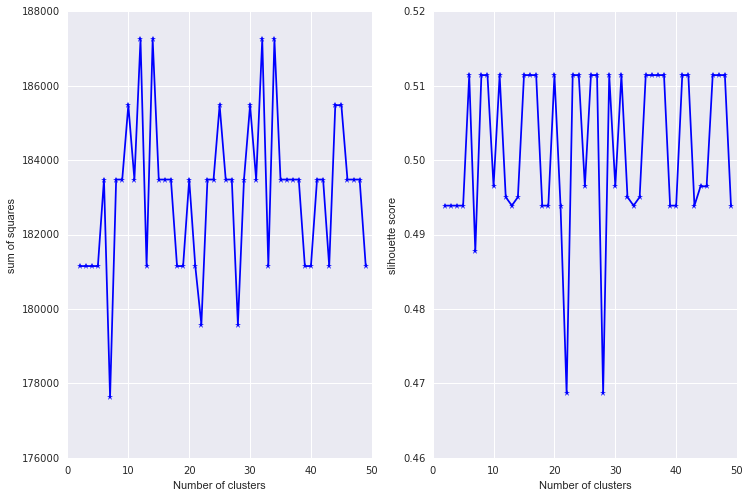

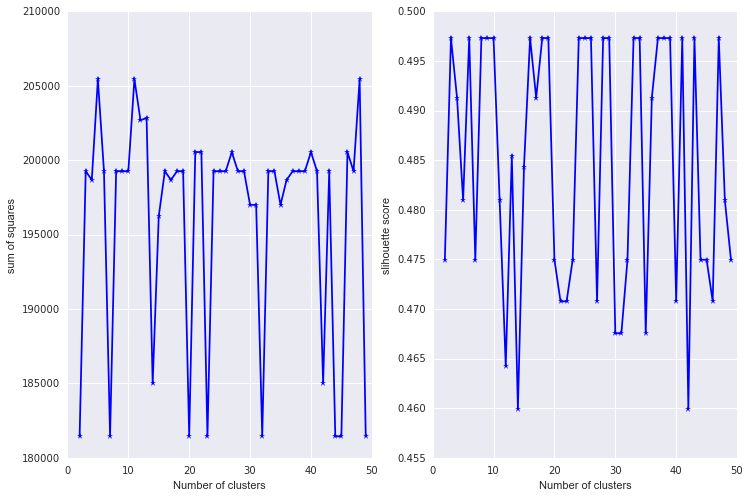

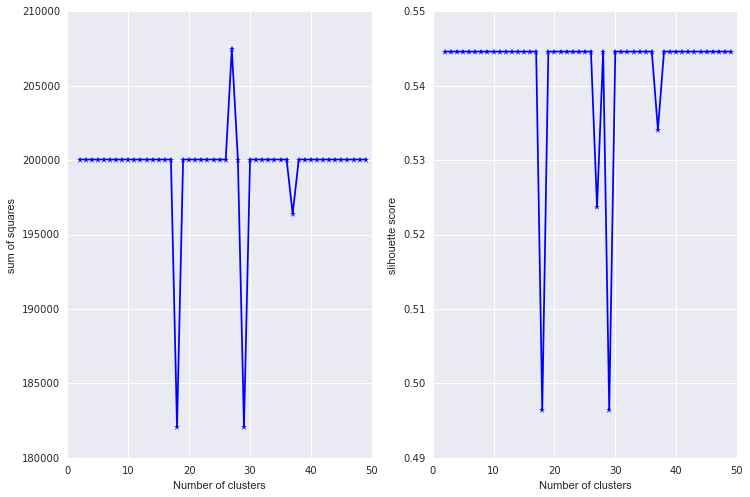

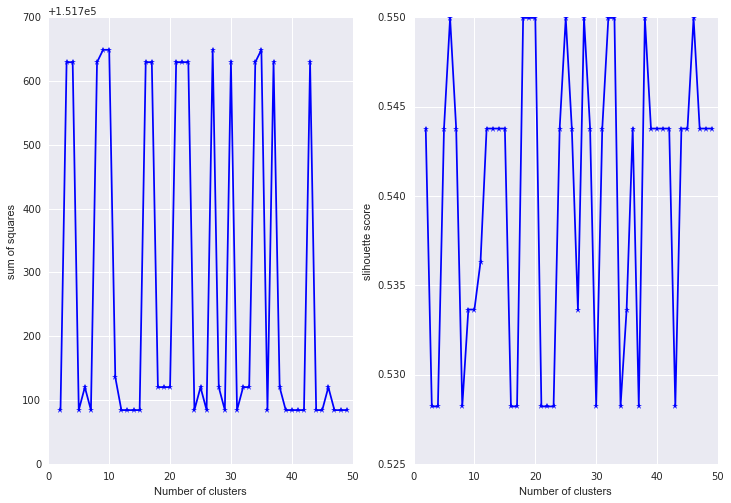

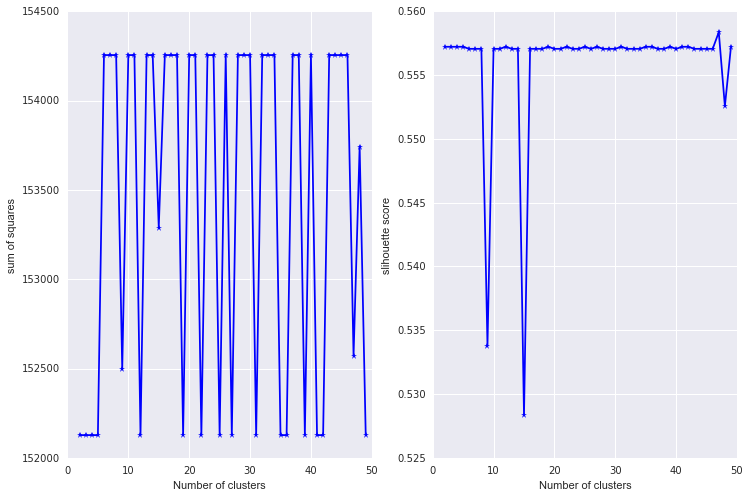

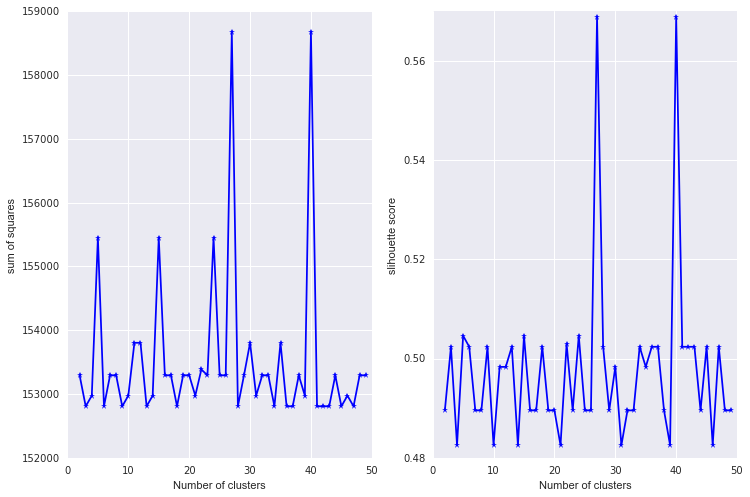

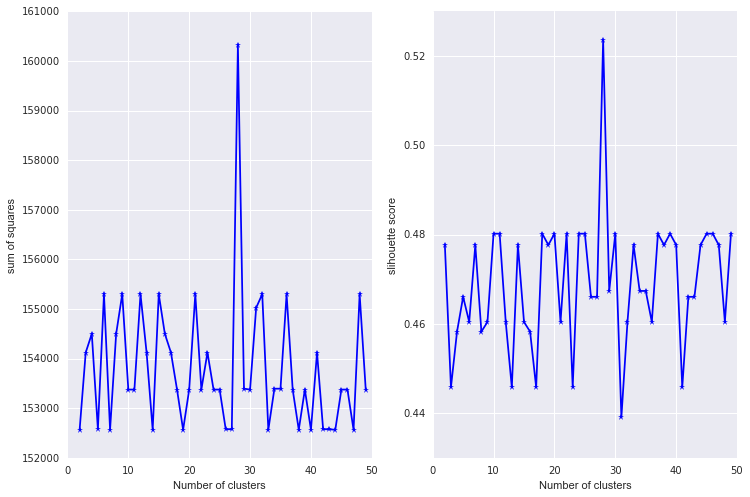

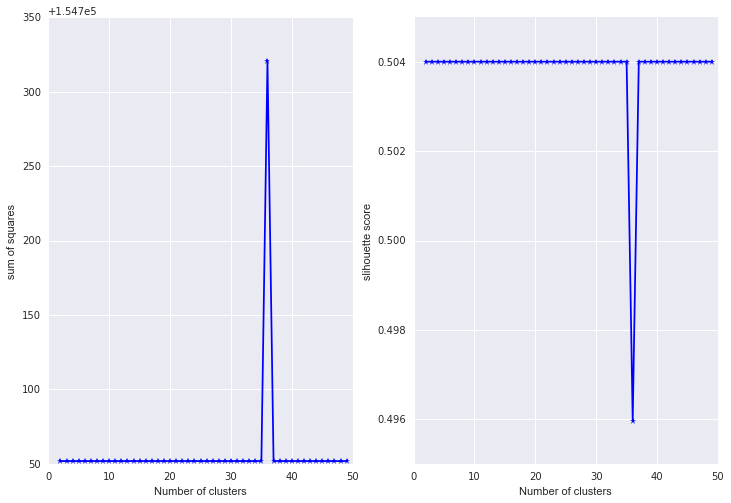

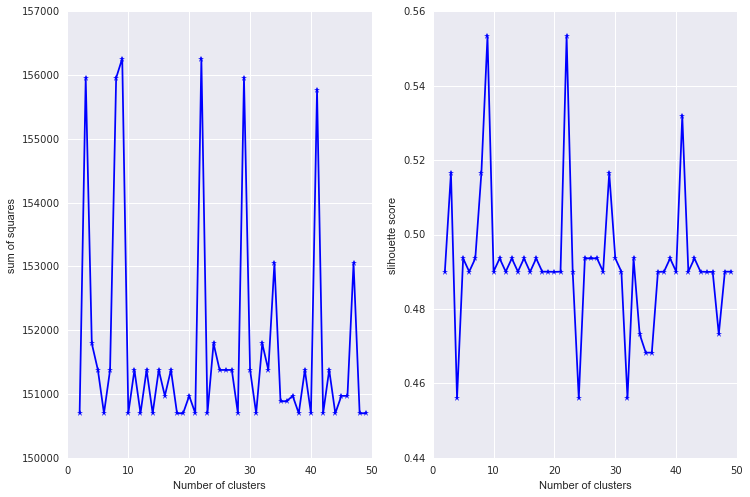

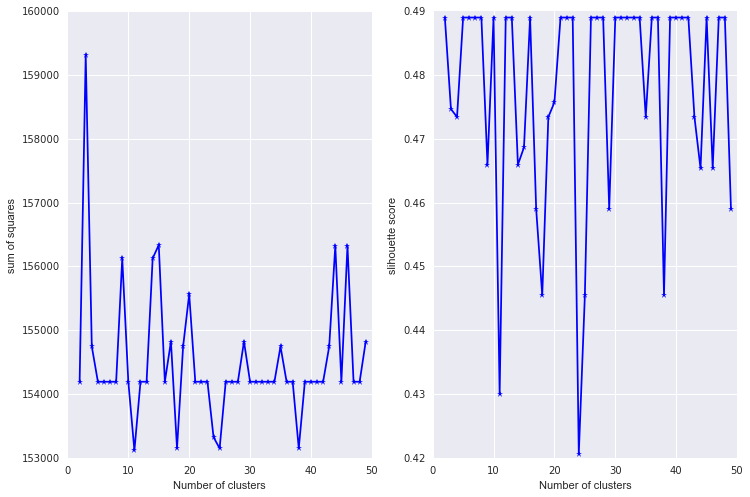

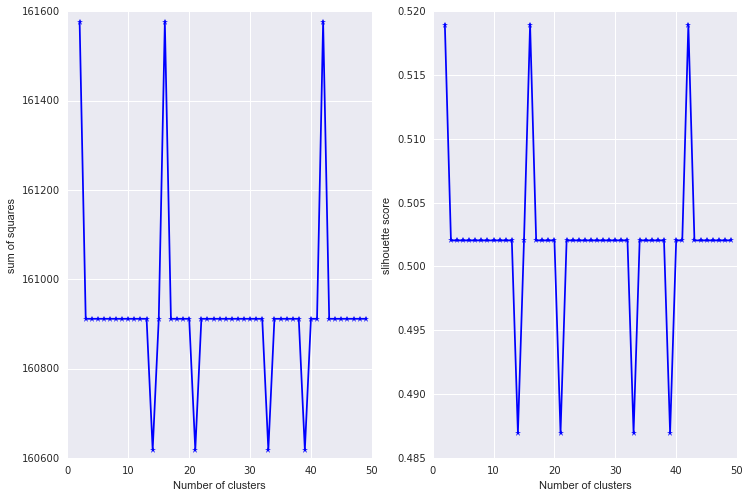

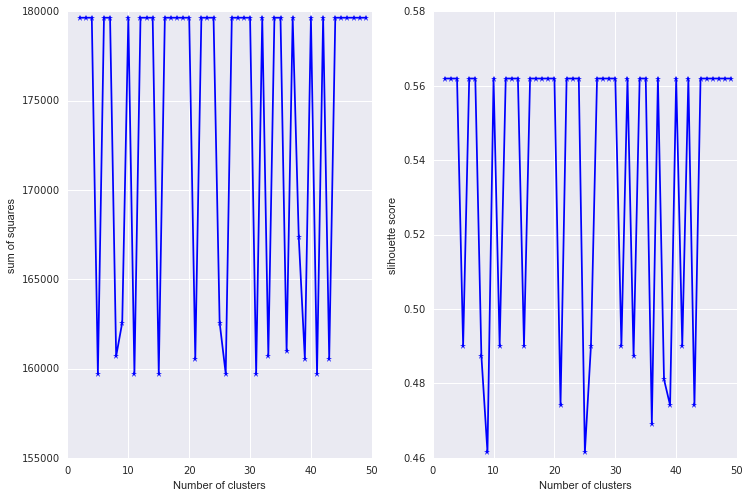

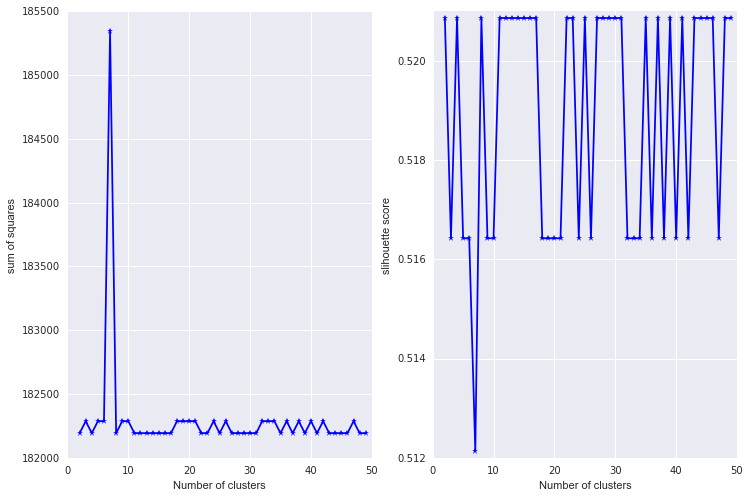

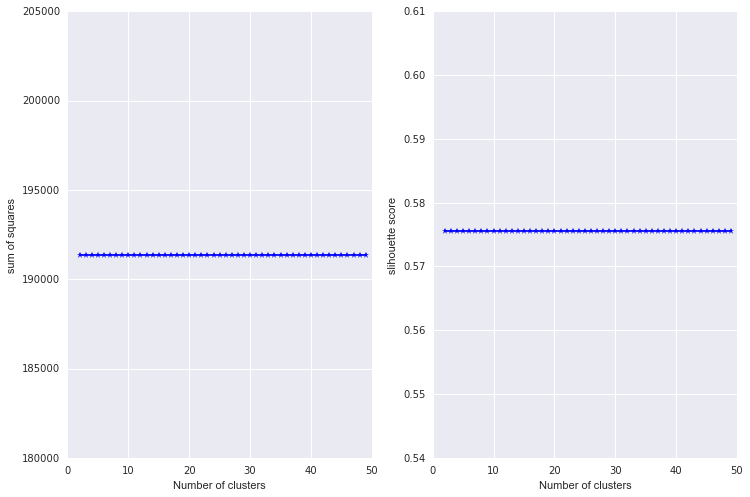

In [74]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
def kmeans_one_year(X, year, yr):
    dists = []
    scores = []
    for k in xrange(2, 50):
#         print k
        kmeanModel = KMeans()
        kmeanModel.fit(X[year == yr])
        centroids = kmeanModel.cluster_centers_
        labels = kmeanModel.labels_
        dist = cdist(X, centroids)
        dists.append(dist.min(axis=1).sum())
        score = silhouette_score(X[year == yr], labels)
        scores.append(score)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(121)
    ax1.plot(xrange(2, 50), dists, 'b*-')
    ax1.grid(True)
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('sum of squares')
    ax2 = fig.add_subplot(122)
    ax2.plot(xrange(2, 50), scores, 'b*-')
    ax2.grid(True)
    ax2.set_xlabel('Number of clusters')
    ax2.set_ylabel('slihouette score')
    plt.show()

def kmeans_all_year(X, year, yrs):
    for yr in yrs:
        kmeans_one_year(X, year, yr)

yrs = sorted(sfdf['Year'].unique())
kmeans_all_year(X, year, yrs)

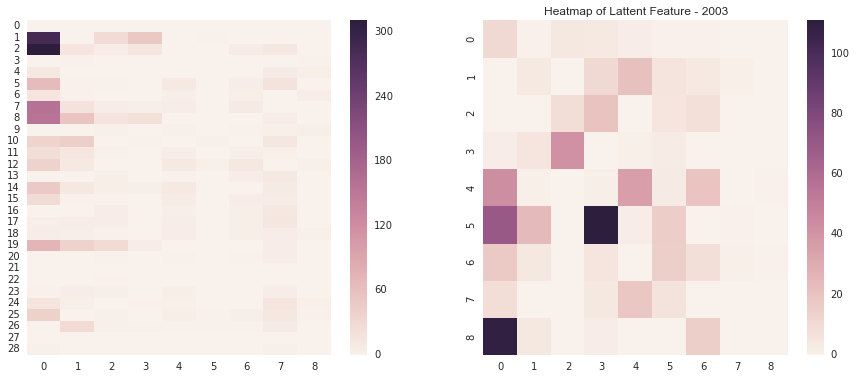

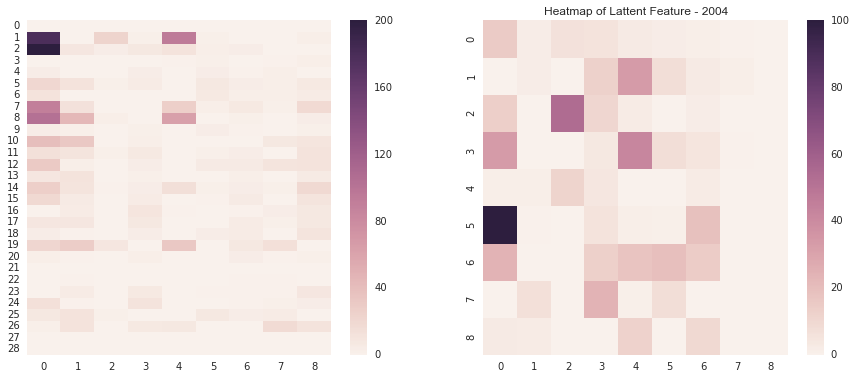

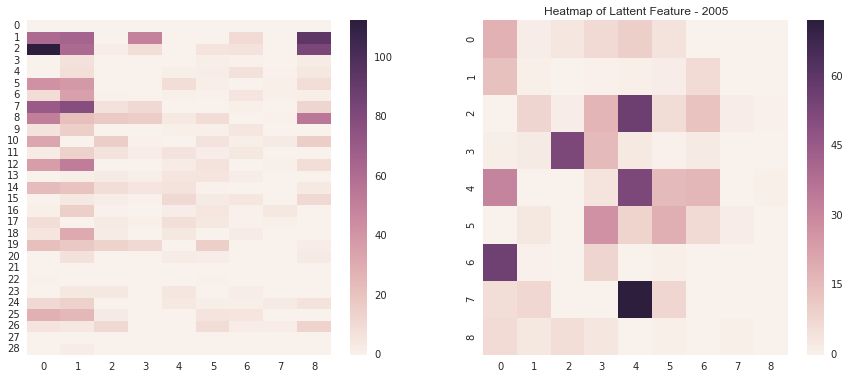

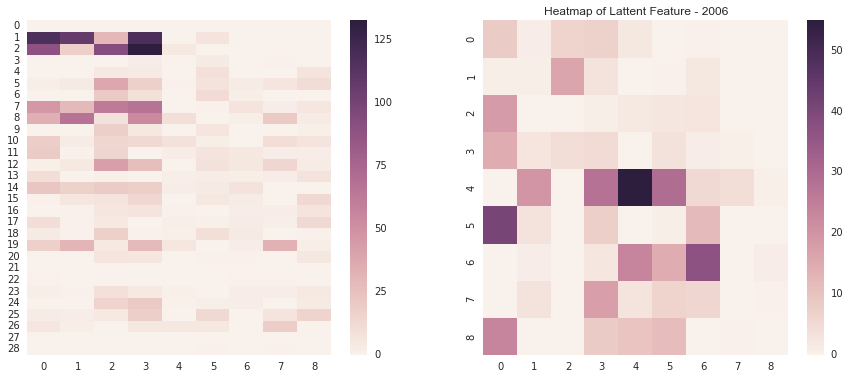

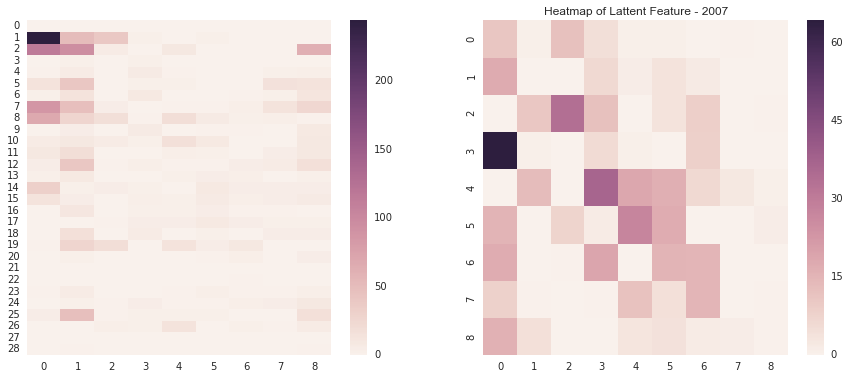

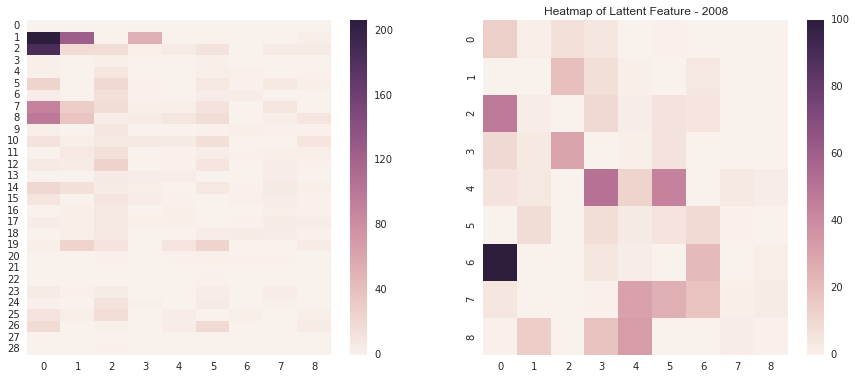

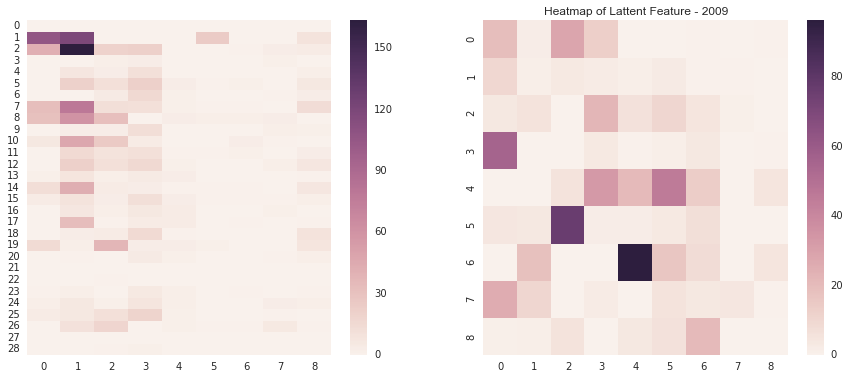

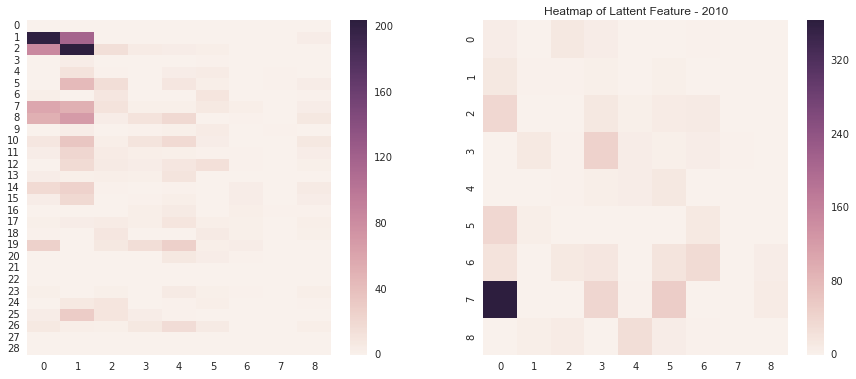

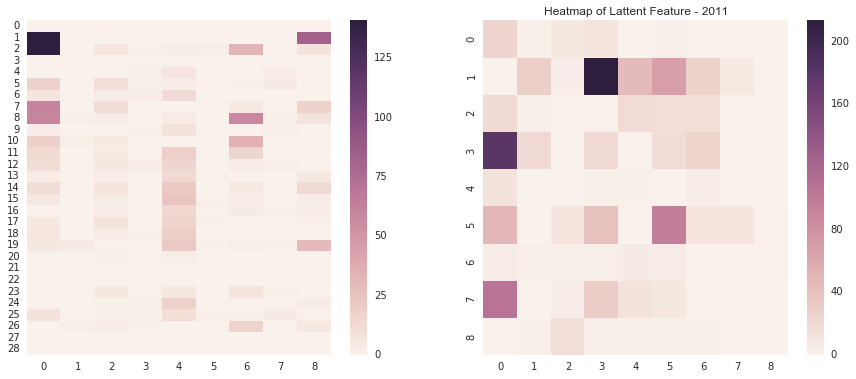

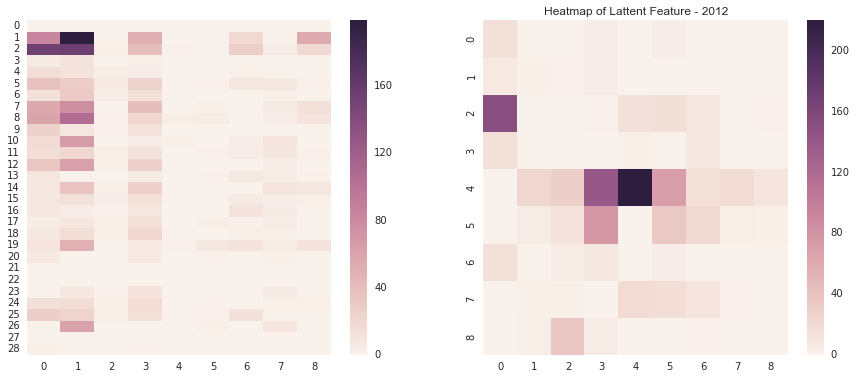

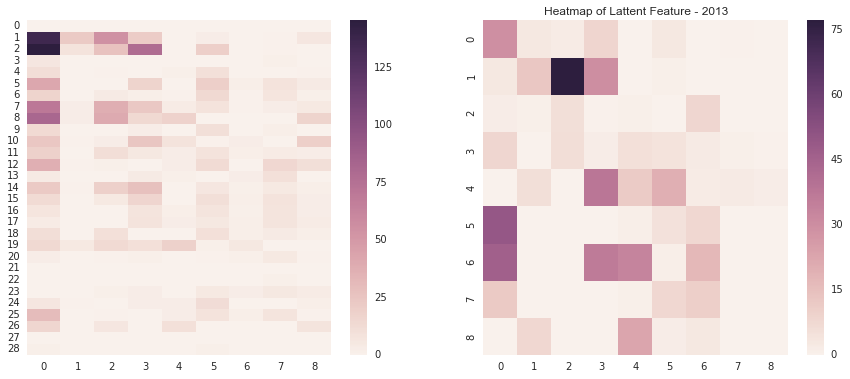

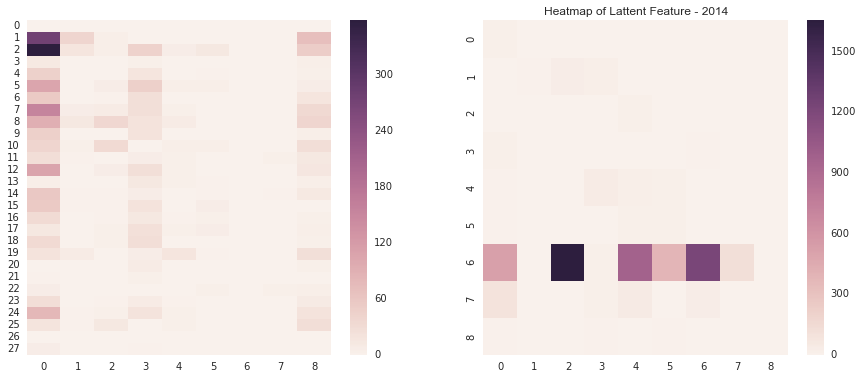

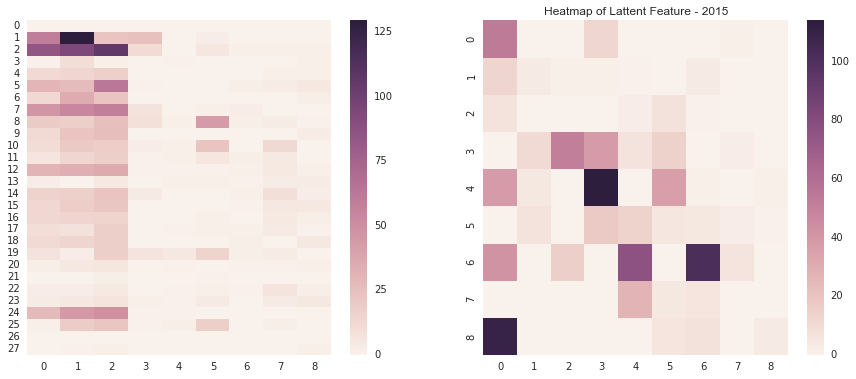

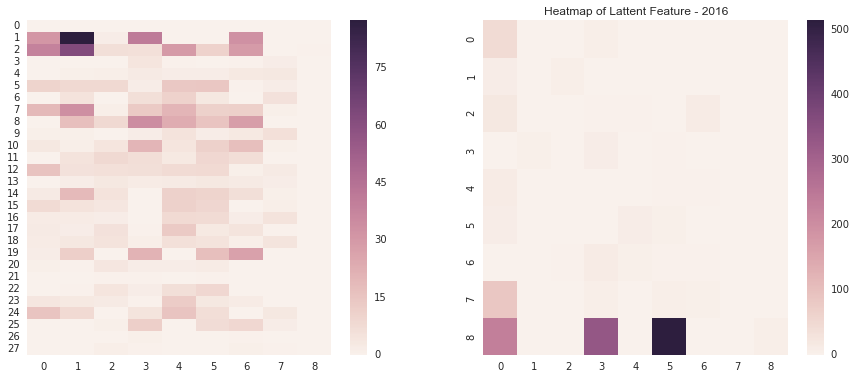

In [77]:
import seaborn as sns
def build_nmf(X, yrs, years):
    Ws = []
    Hs = []
    for yr in years:
#         print yr
        X_yr = X[yrs == yr]
        nmfModel = NMF()
        W = nmfModel.fit_transform(X_yr)
        H = nmfModel.components_
        Ws.append(W)
        Hs.append(H)
        fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15, 6))
        sns.heatmap(W, ax=ax1)
        sns.heatmap(H, ax=ax2)
        plt.title('Heatmap of Lattent Feature - {}'.format(yr))
#         plt.savefig('Heatmap of Lattent Feature - {}.png'.format(yr))
        plt.show()
#     return Ws, Hs
build_nmf(X, year, yrs)

In [2]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
%matplotlib inline

scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
def kmeans_all(X):
    dists = []
    scores = []
    for k in xrange(2, 10):
#         print k
        kmeanModel = KMeans()
        kmeanModel.fit(X)
        centroids = kmeanModel.cluster_centers_
        labels = kmeanModel.labels_
        dist = cdist(X, centroids)
        dists.append(dist.min(axis=1).sum())
        score = silhouette_score(X, labels)
        scores.append(score)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(121)
    ax1.plot(xrange(2, 10), dists, 'b*-')
    ax1.grid(True)
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('sum of squares')
    ax2 = fig.add_subplot(122)
    ax2.plot(xrange(2, 10), scores, 'b*-')
    ax2.grid(True)
    ax2.set_xlabel('Number of clusters')
    ax2.set_ylabel('slihouette score')
    plt.show()

kmeans_all(X)

NameError: name 'X' is not defined

In [1]:
crimes = {1: 'Theft/Larcery', 2: 'Robebery', 3: 'Nacotic/Alcochol',
          4: 'Assault', 5: 'Grand Auto Theft', 6: 'Vandalism',
          7: 'Burglary', 8: 'Homicide', 9: 'Sex Crime', 10: 'DUI'}

In [ ]:
def build_nmf_all(X):
#         print yr
    nmfModel = NMF()
    W = nmfModel.fit_transform(X)
    H = nmfModel.components_
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15, 6))
    sns.heatmap(W, ax=ax1)
    sns.heatmap(H, ax=ax2)
    plt.title('Heatmap of Lattent Feature')
#         plt.savefig('Heatmap of Lattent Feature - {}.png'.format(yr))
    plt.show()
#     return Ws, Hs
build_nmf_all(X)
